In [35]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation
from bhtsne import tsne
a = np.random.randn(2000,1000)
a
a_tsne = tsne(a,dimensions=2)

In [20]:
label_and_vector1 = pickle.load(open("/mnt/drobo/matsumoto/PICKLE_FILE_cost/label_and_vector_cost1.p","rb"))

In [21]:
label_and_vector2 = pickle.load(open("/mnt/drobo/matsumoto/PICKLE_FILE_cost/label_and_vector_cost2.p","rb"))

In [22]:
label_and_vector3 = pickle.load(open("/mnt/drobo/matsumoto/PICKLE_FILE_cost/label_and_vector_cost3.p","rb"))

In [23]:
id_list1 = pickle.load(open("/mnt/drobo/matsumoto/PICKLE_FILE_cost/id_list_cost1.p","rb"))

In [24]:
id_list2 = pickle.load(open("/mnt/drobo/matsumoto/PICKLE_FILE_cost/id_list_cost2.p","rb"))

In [25]:
id_list3 = pickle.load(open("/mnt/drobo/matsumoto/PICKLE_FILE_cost/id_list_cost3.p","rb"))

In [26]:
# ---------------label_and_vectro to all_answer and all_array---------------
all_array = []
all_answer = []
all_id = []
for id_ in id_list1:
    label = label_and_vector1[id_+"_label"]
    vector = label_and_vector1[id_+"_vector"]
    if label != "SECOND CLASS":
        all_array.append(vector)
        all_answer.append(label)
        all_id.append(id_)
for id_ in id_list2:
    label = label_and_vector2[id_+"_label"]
    vector = label_and_vector2[id_+"_vector"]
    if label != "SECOND CLASS":
        all_array.append(vector)
        all_answer.append(label)
        all_id.append(id_)
for id_ in id_list3:
    label = label_and_vector3[id_+"_label"]
    vector = label_and_vector3[id_+"_vector"]
    if label != "SECOND CLASS":
        all_array.append(vector)
        all_answer.append(label)
        all_id.append(id_)

In [29]:
# ---------------decrese float's numerical memory-cosistence---------------not used now
all_vector = []
for vector in all_array:
    all_vector_pre = []
    for float_1 in vector:
        float_2 = int(float_1*100000000)
        float_3 = float_2/100000000
        all_vector_pre.append(float_3)
    all_vector.append(all_vector_pre)
all_array = []
all_array = all_vector


In [30]:
# ---------------change all_answer to {0,1}---------------
tmp = []
for i in all_answer:
    if i == 'FIRST CLASS':
        tmp.append(1)
    if i == 'THIRD CLASS':
        tmp.append(0)
all_answer = []
all_answer = tmp

In [31]:
np.array(all_array).shape

(17081, 2081)

In [32]:
all_array_ = []
for i in range(len(all_array)):
    array = all_array[i][0:39]+all_array[i][63:2081]
    all_array_.append(array)
all_array = []
all_array = all_array_

In [33]:
all_array_ = []
for i in range(len(all_array)):
    array = all_array[i][133:1157]
    all_array_.append(array)
all_array = []
all_array = all_array_

In [34]:
np.array(all_array).shape

(17081, 1024)

In [37]:
all_array_tsne = tsne(np.array(all_array),dimensions=2)

In [38]:
all_array_tsne.shape

(17081, 2)

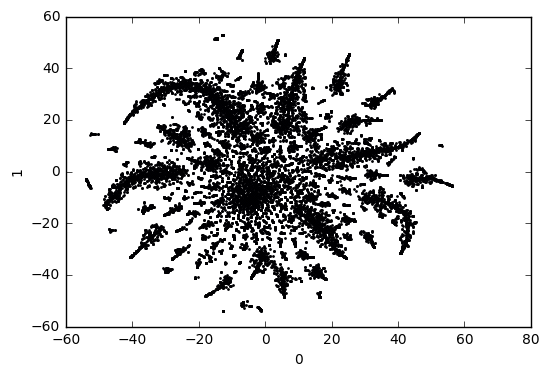

In [48]:
pd.DataFrame(all_array_tsne).plot(kind='scatter', x=0, y=1, s=1);

In [42]:
np.array(all_id).shape

(17081,)

In [51]:
df_tsne = pd.DataFrame(all_array_tsne)
df_id_tsne = pd.DataFrame(np.array(all_id))
df_id_tsne.columns = ["ids"]
df_all_data_tsne = pd.concat([df_id_tsne, df_tsne], axis=1)

In [114]:
df_all_data_tsne=df_all_data_tsne[~df_all_data_tsne.ids.duplicated()] 
df_all_data_tsne=df_all_data_tsne.reset_index(drop=True)

In [259]:
id_list_pickle_1 = pickle.load(open("image_ids_1.p","rb"))

In [169]:
zero_df_1 = []
zero_id_1 = []
for st in id_list_pickle["one_to_zero"]:
    df_index = int(np.where(df_all_data_tsne["ids"]==st)[0])
    zero_df_1.append([df_all_data_tsne[0][df_index],df_all_data_tsne[1][df_index]])
    zero_id_1.append(st)
zero_df_1 = pd.DataFrame(zero_df_1)

In [170]:
three_df_1 = []
for st in id_list_pickle["two_to_three"]:
    df_index = int(np.where(df_all_data_tsne["ids"]==st)[0])
    three_df_1.append([df_all_data_tsne[0][df_index],df_all_data_tsne[1][df_index]])
three_df_1 = pd.DataFrame(three_df_1)

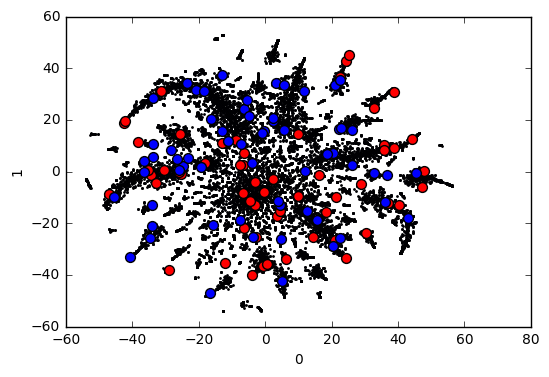

In [171]:
ax = pd.DataFrame(all_array_tsne).plot(kind='scatter', x=0, y=1, s=1);
pd.DataFrame(zero_df_1).plot(kind='scatter', x=0, y=1, s=50,color = "red", ax = ax);
pd.DataFrame(three_df_1).plot(kind='scatter', x=0, y=1, s=50,color = "blue", ax = ax);

In [258]:
id_list_pickle_2 = pickle.load(open("image_ids_2.p","rb"))

In [165]:
zero_df_2 = []
for st in id_list_pickle["one_to_zero"]:
    df_index = int(np.where(df_all_data_tsne["ids"]==st)[0])
    zero_df_2.append([df_all_data_tsne[0][df_index],df_all_data_tsne[1][df_index]])
zero_df_2 = pd.DataFrame(zero_df_2)

In [166]:
three_df_2 = []
for st in id_list_pickle["two_to_three"]:
    df_index = int(np.where(df_all_data_tsne["ids"]==st)[0])
    three_df_2.append([df_all_data_tsne[0][df_index],df_all_data_tsne[1][df_index]])
three_df_2 = pd.DataFrame(three_df_2)

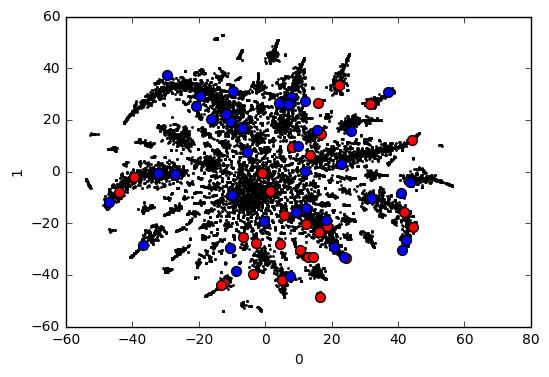

In [167]:
ax = pd.DataFrame(all_array_tsne).plot(kind='scatter', x=0, y=1, s=1);
pd.DataFrame(zero_df_2).plot(kind='scatter', x=0, y=1, s=50,color = "red", ax = ax);
pd.DataFrame(three_df_2).plot(kind='scatter', x=0, y=1, s=50,color = "blue", ax = ax);

In [287]:
id_list_pickle_3 = pickle.load(open("image_ids_3.p","rb"))

In [288]:
zero_df = []
for st in id_list_pickle_3["one_to_zero"]:
    df_index = int(np.where(df_all_data_tsne["ids"]==st)[0])
    zero_df.append([df_all_data_tsne[0][df_index],df_all_data_tsne[1][df_index]])
zero_df = pd.DataFrame(zero_df)

In [289]:
three_df = []
for st in id_list_pickle_3["two_to_three"]:
    df_index = int(np.where(df_all_data_tsne["ids"]==st)[0])
    three_df.append([df_all_data_tsne[0][df_index],df_all_data_tsne[1][df_index]])
three_df = pd.DataFrame(three_df)

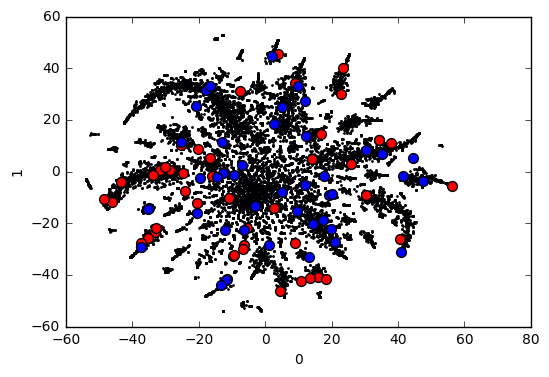

In [290]:
ax = pd.DataFrame(all_array_tsne).plot(kind='scatter', x=0, y=1, s=1);
pd.DataFrame(zero_df).plot(kind='scatter', x=0, y=1, s=50,color = "red", ax = ax);
pd.DataFrame(three_df).plot(kind='scatter', x=0, y=1, s=50,color = "blue", ax = ax);

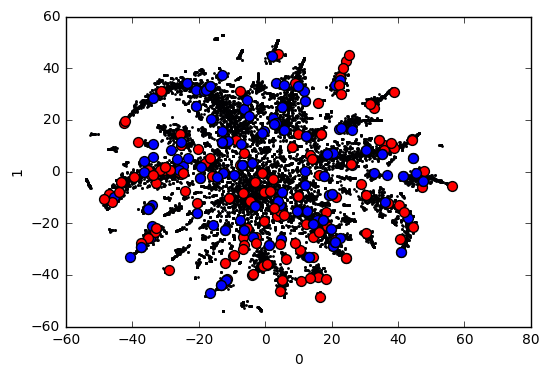

In [294]:
ax = pd.DataFrame(all_array_tsne).plot(kind='scatter', x=0, y=1, s=1);
pd.DataFrame(zero_df_1).plot(kind='scatter', x=0, y=1, s=50,color = "red", ax = ax);
pd.DataFrame(three_df_1).plot(kind='scatter', x=0, y=1, s=50,color = "blue", ax = ax);
pd.DataFrame(zero_df_2).plot(kind='scatter', x=0, y=1, s=50,color = "red", ax = ax);
pd.DataFrame(three_df).plot(kind='scatter', x=0, y=1, s=50,color = "blue", ax = ax);
pd.DataFrame(zero_df).plot(kind='scatter', x=0, y=1, s=50,color = "red", ax = ax);
pd.DataFrame(three_df).plot(kind='scatter', x=0, y=1, s=50,color = "blue", ax = ax);

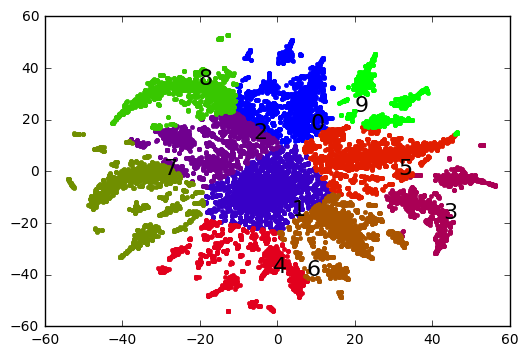

In [155]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.cm as cm
# クラスタの数`n_clusters`はTSNEのグラフを見て、感覚で決めた
kmeans = MiniBatchKMeans(n_clusters=10, max_iter=300)
kmeans_tsne = kmeans.fit_predict(all_array_tsne)

#いい感じに色を付ける
color=cm.brg(np.linspace(0,1,np.max(kmeans_tsne) - np.min(kmeans_tsne)+1))
for i in range(np.min(kmeans_tsne), np.max(kmeans_tsne)+1):
    plt.plot(all_array_tsne[kmeans_tsne == i][:,0],
             all_array_tsne[kmeans_tsne == i][:,1],
             ".",
             color=color[i]
             )
    plt.text(all_array_tsne[kmeans_tsne == i][:,0][0],
             all_array_tsne[kmeans_tsne == i][:,1][0],
             str(i), color="black", size=16
             )
    
    

plt.show()

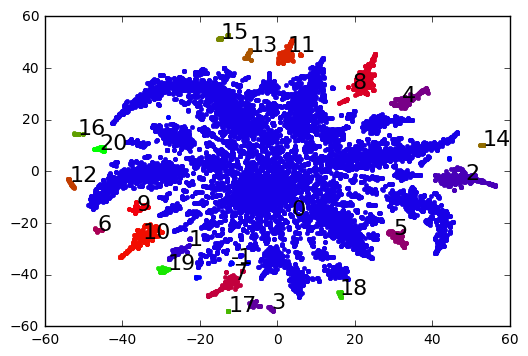

In [225]:
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm
# `eps`は試行錯誤した結果
dbscan = DBSCAN(eps=3,min_samples=20)
dbscan_tsne = dbscan.fit_predict(all_array_tsne)

#いい感じに色を付ける
color=cm.brg(np.linspace(0,1,np.max(dbscan_tsne) - np.min(dbscan_tsne)+1))
for i in range(np.min(dbscan_tsne), np.max(dbscan_tsne)+1):
    plt.plot(all_array_tsne[dbscan_tsne == i][:,0],
             all_array_tsne[dbscan_tsne == i][:,1],
             ".",
             color=color[i+1]
             )
    plt.text(all_array_tsne[dbscan_tsne == i][:,0][0],
             all_array_tsne[dbscan_tsne == i][:,1][0],
             str(i), color="black", size=16
             )
    
    
plt.show()

In [125]:
df_one_to_zero_id = pd.DataFrame(id_list_pickle["one_to_zero"])
df_one_to_zero_id.columns = ["ids"]
df_one_to_zero = pd.concat([df_one_to_zero_id, zero_df], axis=1)

df_two_to_three_id = pd.DataFrame(id_list_pickle["two_to_three"])
df_two_to_three_id.columns = ["ids"]
df_two_to_three = pd.concat([df_two_to_three_id, three_df], axis=1)

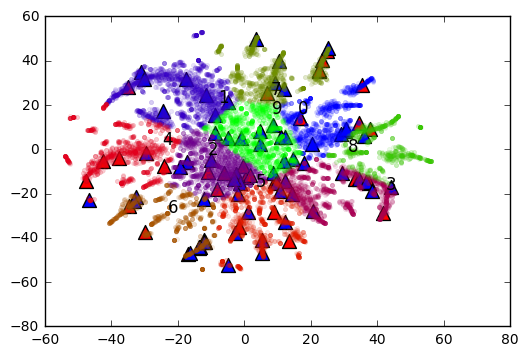

In [153]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.cm as cm
# クラスタの数`n_clusters`はTSNEのグラフを見て、感覚で決めた
kmeans = MiniBatchKMeans(n_clusters=10, max_iter=300)
kmeans_tsne = kmeans.fit_predict(all_array_tsne)

#いい感じに色を付ける
color=cm.brg(np.linspace(0,1,np.max(kmeans_tsne) - np.min(kmeans_tsne)+1))
for i in range(np.min(kmeans_tsne), np.max(kmeans_tsne)+1):
    plt.plot(all_array_tsne[kmeans_tsne == i][:,0],
             all_array_tsne[kmeans_tsne == i][:,1],
             ".",
             color=color[i],
             alpha = 0.1
             )
    plt.text(all_array_tsne[kmeans_tsne == i][:,0][0],
             all_array_tsne[kmeans_tsne == i][:,1][0],
             str(i), color="black", size=12
             )
    
    
plt.scatter(zero_df[0],zero_df[1],c = "red", s = 100, marker = "^")
plt.scatter(three_df[0],three_df[1],c = "blue", s = 100, marker = "^")
plt.show()

cluster0: 0.2562929061784897
cluster1: 0.42953020134228187
cluster2: 0.3515981735159817
cluster3: 0.3471030042918455
cluster4: 0.4331826985151711
cluster5: 0.305287094940307
cluster6: 0.31947652040030794
cluster7: 0.3723487824037706
cluster8: 0.34579439252336447
cluster9: 0.3679624664879357


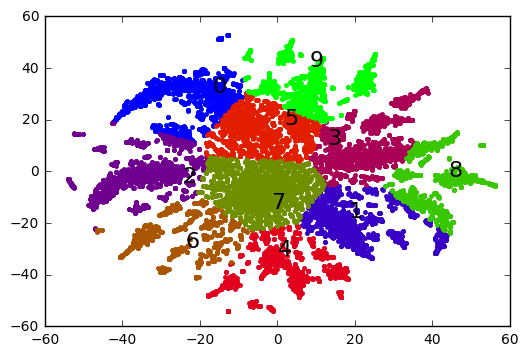

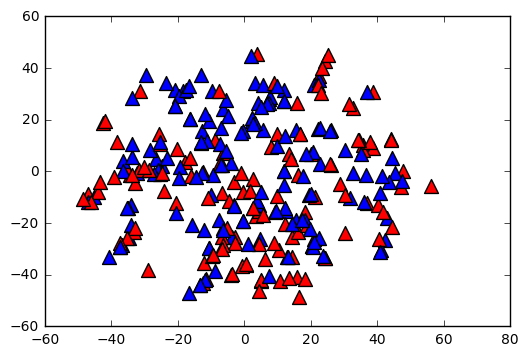

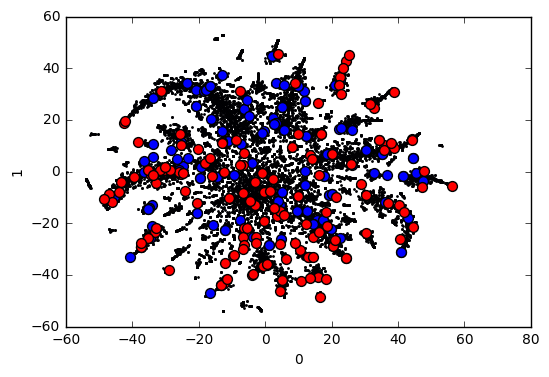

In [297]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.cm as cm
# クラスタの数`n_clusters`はTSNEのグラフを見て、感覚で決めた
kmeans = MiniBatchKMeans(n_clusters=10, max_iter=300)
kmeans_tsne = kmeans.fit_predict(all_array_tsne)

for i in range(np.min(kmeans_tsne), np.max(kmeans_tsne)+1):
    score = []
    for c in np.where(kmeans_tsne == i)[0]:
        score.append(all_answer[c])
    score_ = score.count(1)/len(score)
    print("cluster"+str(i)+": "+str(score_))
    
#いい感じに色を付ける
color=cm.brg(np.linspace(0,1,np.max(kmeans_tsne) - np.min(kmeans_tsne)+1))
for i in range(np.min(kmeans_tsne), np.max(kmeans_tsne)+1):
    plt.plot(all_array_tsne[kmeans_tsne == i][:,0],
             all_array_tsne[kmeans_tsne == i][:,1],
             ".",
             color=color[i],
             
             )
    plt.text((all_array_tsne[kmeans_tsne == i][:,0][0]+all_array_tsne[kmeans_tsne == i][:,0][-1])/2,
             (all_array_tsne[kmeans_tsne == i][:,1][0]+all_array_tsne[kmeans_tsne == i][:,1][-1])/2,
             str(i), color="black", size=16
             )
    
plt.show()
plt.scatter(zero_df_1[0],zero_df_1[1],c = "red", s = 100, marker = "^")
plt.scatter(three_df_1[0],three_df_1[1],c = "blue", s = 100, marker = "^")
plt.scatter(zero_df_2[0],zero_df_2[1],c = "red", s = 100, marker = "^")
plt.scatter(three_df_2[0],three_df_2[1],c = "blue", s = 100, marker = "^")
plt.scatter(zero_df[0],zero_df[1],c = "red", s = 100, marker = "^")
plt.scatter(three_df[0],three_df[1],c = "blue", s = 100, marker = "^")
plt.show()

ax = pd.DataFrame(all_array_tsne).plot(kind='scatter', x=0, y=1, s=1);
pd.DataFrame(three_df_1).plot(kind='scatter', x=0, y=1, s=50,color = "blue", ax = ax);
pd.DataFrame(three_df).plot(kind='scatter', x=0, y=1, s=50,color = "blue", ax = ax);
pd.DataFrame(three_df).plot(kind='scatter', x=0, y=1, s=50,color = "blue", ax = ax);
pd.DataFrame(zero_df_1).plot(kind='scatter', x=0, y=1, s=50,color = "red", ax = ax);
pd.DataFrame(zero_df_2).plot(kind='scatter', x=0, y=1, s=50,color = "red", ax = ax);
pd.DataFrame(zero_df).plot(kind='scatter', x=0, y=1, s=50,color = "red", ax = ax);

In [242]:
cluster_0_id = []
for c in np.where(kmeans_tsne == 0)[0]:
    cluster_0_id.append(all_id[c])
cluster_1_id = []
for c in np.where(kmeans_tsne == 1)[0]:
    cluster_1_id.append(all_id[c])
cluster_2_id = []
for c in np.where(kmeans_tsne == 2)[0]:
    cluster_2_id.append(all_id[c])
cluster_3_id = []
for c in np.where(kmeans_tsne == 3)[0]:
    cluster_3_id.append(all_id[c])
cluster_4_id = []
for c in np.where(kmeans_tsne == 4)[0]:
    cluster_4_id.append(all_id[c])
cluster_5_id = []
for c in np.where(kmeans_tsne == 5)[0]:
    cluster_5_id.append(all_id[c])
cluster_6_id = []
for c in np.where(kmeans_tsne == 6)[0]:
    cluster_6_id.append(all_id[c])
cluster_7_id = []
for c in np.where(kmeans_tsne == 7)[0]:
    cluster_7_id.append(all_id[c])
cluster_8_id = []
for c in np.where(kmeans_tsne == 8)[0]:
    cluster_8_id.append(all_id[c])
cluster_9_id = []
for c in np.where(kmeans_tsne == 9)[0]:
    cluster_9_id.append(all_id[c])

In [243]:
os.remove("cluster.p")
cluster = {}
cluster["0"]=cluster_0_id
cluster["1"]=cluster_1_id
cluster["2"]=cluster_2_id
cluster["3"]=cluster_3_id
cluster["4"]=cluster_4_id
cluster["5"]=cluster_5_id
cluster["6"]=cluster_6_id
cluster["7"]=cluster_7_id
cluster["8"]=cluster_8_id
cluster["9"]=cluster_9_id

pickle.dump(cluster, open("cluster.p","wb"))

In [244]:
len(cluster_7_id)

845

In [246]:
len(cluster_4_id)

1666

In [245]:
for i in range(len(cluster_7_id)):
    if i % 9 == 4 or i % 9 == 8:
        os.system("cp /mnt/drobo/matsumoto/IMAGES/"+cluster_7_id[i]+"_1.jpg /mnt/drobo/matsumoto/IMAGE_TRANSPORT/CLUSTER_7")

In [247]:
for i in range(len(cluster_4_id)):
    if i % 9 == 7:
        os.system("cp /mnt/drobo/matsumoto/IMAGES/"+cluster_4_id[i]+"_1.jpg /mnt/drobo/matsumoto/IMAGE_TRANSPORT/CLUSTER_4")

cluster0: 0.3766617429837518
cluster1: 0.2899233942251031
cluster2: 0.34799532892175944
cluster3: 0.33297872340425533
cluster4: 0.36125
cluster5: 0.36224188790560474
cluster6: 0.37899786780383793
cluster7: 0.43548387096774194
cluster8: 0.25263157894736843
cluster9: 0.3605177993527508


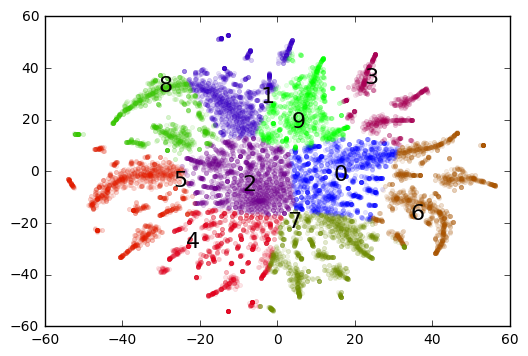

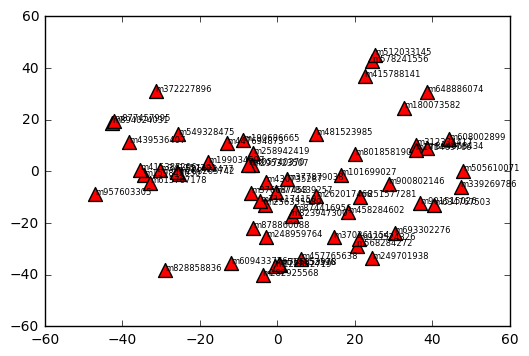

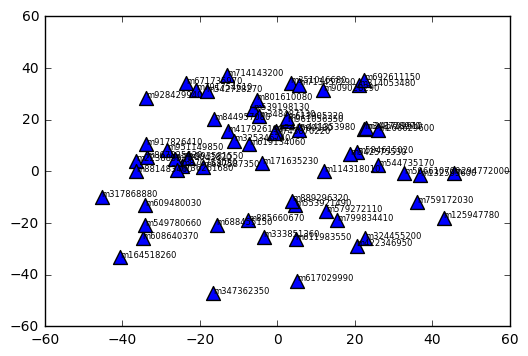

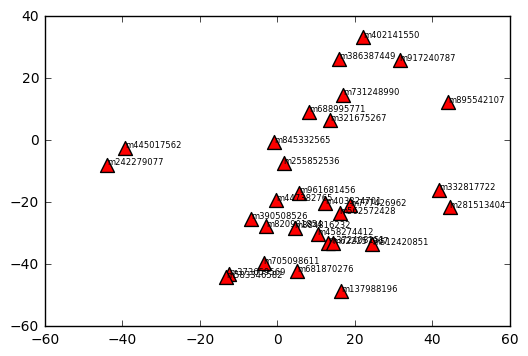

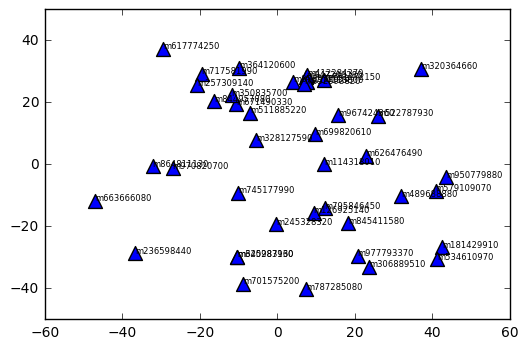

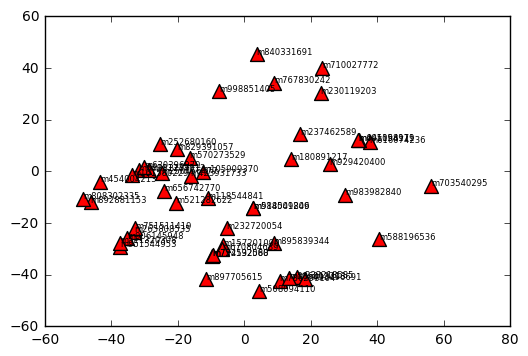

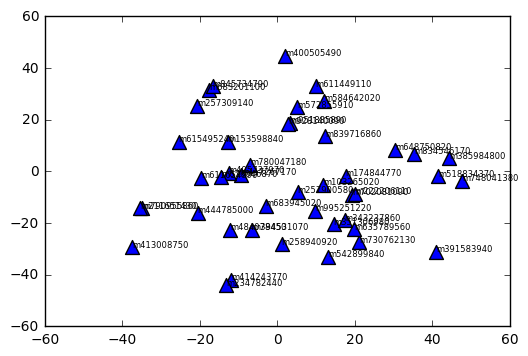

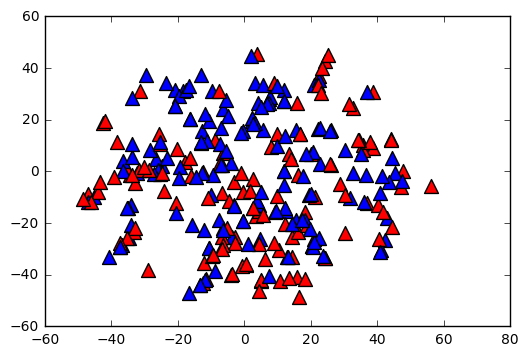

In [293]:
from sklearn.cluster import MiniBatchKMeans
import matplotlib.cm as cm
# クラスタの数`n_clusters`はTSNEのグラフを見て、感覚で決めた
kmeans = MiniBatchKMeans(n_clusters=10, max_iter=300)
kmeans_tsne = kmeans.fit_predict(all_array_tsne)

for i in range(np.min(kmeans_tsne), np.max(kmeans_tsne)+1):
    score = []
    for c in np.where(kmeans_tsne == i)[0]:
        score.append(all_answer[c])
    score_ = score.count(1)/len(score)
    print("cluster"+str(i)+": "+str(score_))
    
#いい感じに色を付ける
color=cm.brg(np.linspace(0,1,np.max(kmeans_tsne) - np.min(kmeans_tsne)+1))
for i in range(np.min(kmeans_tsne), np.max(kmeans_tsne)+1):
    plt.plot(all_array_tsne[kmeans_tsne == i][:,0],
             all_array_tsne[kmeans_tsne == i][:,1],
             ".",
             color=color[i],
             alpha = 0.1
             )
    plt.text((all_array_tsne[kmeans_tsne == i][:,0][0]+all_array_tsne[kmeans_tsne == i][:,0][-1])/2,
             (all_array_tsne[kmeans_tsne == i][:,1][0]+all_array_tsne[kmeans_tsne == i][:,1][-1])/2,
             str(i), color="black", size=16
             )
    
    
plt.show()

plt.scatter(zero_df_1[0],zero_df_1[1],c = "red", s = 100, marker = "^")
for i in range(len(zero_df_1)):
    plt.text(zero_df_1[0][i],zero_df_1[1][i],id_list_pickle_1["one_to_zero"][i],color="black", size=6)
plt.show()
plt.scatter(three_df_1[0],three_df_1[1],c = "blue", s = 100, marker = "^")
for i in range(len(three_df_1)):
    plt.text(three_df_1[0][i],three_df_1[1][i],id_list_pickle_1["two_to_three"][i],color="black", size=6)
plt.show()

plt.scatter(zero_df_2[0],zero_df_2[1],c = "red", s = 100, marker = "^")
for i in range(len(zero_df_2)):
    plt.text(zero_df_2[0][i],zero_df_2[1][i],id_list_pickle_2["one_to_zero"][i],color="black", size=6)
plt.show()
plt.scatter(three_df_2[0],three_df_2[1],c = "blue", s = 100, marker = "^")
for i in range(len(three_df_2)):
    plt.text(three_df_2[0][i],three_df_2[1][i],id_list_pickle_2["two_to_three"][i],color="black", size=6)
plt.show()

plt.scatter(zero_df[0],zero_df[1],c = "red", s = 100, marker = "^")
for i in range(len(zero_df)):
    plt.text(zero_df[0][i],zero_df[1][i],id_list_pickle_3["one_to_zero"][i],color="black", size=6)
plt.show()
plt.scatter(three_df[0],three_df[1],c = "blue", s = 100, marker = "^")
for i in range(len(three_df)):
    plt.text(three_df[0][i],three_df[1][i],id_list_pickle_3["two_to_three"][i],color="black", size=6)
plt.show()

plt.scatter(zero_df_1[0],zero_df_1[1],c = "red", s = 100, marker = "^")
plt.scatter(three_df_1[0],three_df_1[1],c = "blue", s = 100, marker = "^")
plt.scatter(zero_df_2[0],zero_df_2[1],c = "red", s = 100, marker = "^")
plt.scatter(three_df_2[0],three_df_2[1],c = "blue", s = 100, marker = "^")
plt.scatter(zero_df[0],zero_df[1],c = "red", s = 100, marker = "^")
plt.scatter(three_df[0],three_df[1],c = "blue", s = 100, marker = "^")
plt.show()


In [298]:
handed_cluster_red2 = ["m512033145","m578241556","m415788141","m402141550","m710027772","m230119203"]

In [295]:
handed_cluster_red1 = ["m957603305","m242279077","m445017562","m808302335","m892881153","m454002213"]

In [296]:
for i in handed_cluster_red1:
    os.system("cp /mnt/drobo/matsumoto/IMAGES/"+i+"_1.jpg /mnt/drobo/matsumoto/IMAGE_TRANSPORT/HANDED1")

In [299]:
for i in handed_cluster_red2:
    os.system("cp /mnt/drobo/matsumoto/IMAGES/"+i+"_1.jpg /mnt/drobo/matsumoto/IMAGE_TRANSPORT/HANDED2")